# Logistic Regression: OCR with Scikit-Learn on the Digits dataset

## What are we going to do?
- We will download the handwritten digits dataset to classify it using OCR ("optical character recognition").
- We will preprocess the dataset using Scikit-learn methods.
- We will train a multiclass classification model using Scikit-learn.

OCR is a set of techniques related to machine-learning and deep-learning or neural networks that attempts to visually recognise handwritten characters.

As the character set is relatively small (10 classes), it is a model that we can sometimes simply solve using logistic classification or SVM.

- You can find the features of the dataset here: [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset)
- You can load it with this function: [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
- You can use this notebook as a reference: [Recognising hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

Repeat the steps of the previous exercise to train an OCR ML model on this dataset with Scikit learn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function:

In [15]:
# TODO: Import all the necessary modules into this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Load the Digits dataset

Before starting to work with the dataset, graph some of the examples and their associated classes or digits:

In [8]:
# TODO: Load the Digits dataset as X and Y arrays representing some of the examples
digits = load_digits(as_frame=True)
print(digits.target)
print(digits.data)

X = digits.data
Y = digits.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10

## Preprocess the data

Preprocess the data using Scikit-learn methods, as you did in the Scikit-learn linear regression exercise:

- Randomly reorder the data.
- Normalise the data, if necessary.
- Divide the dataset into training and test subsets.

On this occasion, we will use K-fold cross-validation, as the dataset is very small (150 examples).

In [9]:
# TODO: Randomly reorder the data, normalize it only if necessary, and divide it into training and test subsets.
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train an initial model
- Train an initial model on the training subset without regularisation.
- Test the suitability of the model and retrain it if necessary.

The Scikit-learn function that you can use is [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with an OvR scheme ("one-vs-rest", one class versus the rest).

Evaluate it on the test subset using its `model.score()`:

In [10]:
# TODO: Train your model on the unregularised training subset and evaluate it on the test subset
model = OneVsRestClassifier(LogisticRegression(penalty= None, solver='lbfgs', max_iter=1000))
model.fit(X_train, Y_train)


accuracy = model.score(X_test, Y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9361111111111111


## Find the optimal regularisation using cross-validation
- Train a model for each regularisation value to be considered.
- Train and evaluate them on a training subset fold using K-fold.
- Choose the optimal model and its regularisation.

The LogisticRegression function applies an L2 regularisation by default, although it uses the *C* parameter which represents the inverse of *lambda*:

In [11]:
# TODO: Train a different model for each C on a different K-fold# TODO: Train a different model for each C on a different K-fold

lambdas = [0., 1e-1, 1e1, 1e2, 1e3]
cs = [1/l if l != 0 else 1e12 for l in lambdas]

model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

grid = GridSearchCV(
    estimator=model,
    param_grid={'C': cs},
    cv=5,
    scoring='accuracy')

grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])
print("Best CV score:", grid.best_score_)
test_score = best_model.score(X_test, Y_test)
print("Test set accuracy:", test_score)

Best C: 0.1
Best CV score: 0.9582365466511806
Test set accuracy: 0.9694444444444444


## Finally, evaluate the model on the test subset

- Display the coefficients and intercept of the best model.
- Evaluate the best model on the initial test subset.
- Calculate the hits and misses on the test subset and plot them graphically.

As this dataset is very visual, try to also show the examples where the model has failed visually, and consider whether you would be able to recognise that number.

*Sometimes even a human would have trouble deciphering it based on the handwriting of the writer 8-).*

Intercept coefficients of the trained model
[-0.40457556 -0.20372201 -0.04839856  0.22642225 -0.3225142   0.07253074
 -0.42920592 -0.17918708  1.20119141  0.08745893]
Mean accuracy: 0.97


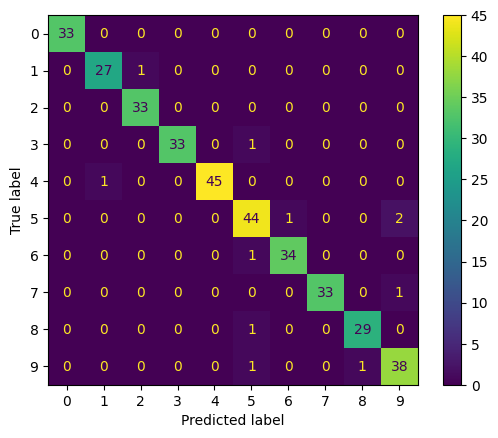

In [16]:
# TODO: Evaluate the best model on the initial test subset

# Display the coefficients and intercept of the best trained model
print('Intercept coefficients of the trained model')
print(best_model.intercept_)


# Make predictions on the test subset
y_test_pred = best_model.predict(X_test)

# Calculate the average ("accuracy") model evaluation metrics (its method score())
mean_accuracy = best_model.score(X_test, Y_test)

print('Mean accuracy: %.2f' % mean_accuracy)


log_cm = confusion_matrix(Y_test, y_test_pred, labels=best_model.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=best_model.classes_)
log_disp.plot(values_format='d')  # 'd' para enteros
plt.show()
